# Decision Trees: Implementasi Praktis

Decision Trees (Pohon Keputusan) adalah salah satu algoritma Machine Learning yang populer dan mudah dipahami. Algoritma ini bekerja dengan cara membuat model prediksi dalam bentuk struktur pohon yang terdiri dari node-node keputusan.

## Apa yang akan kita pelajari?
1. Pengenalan Decision Trees
2. Memahami komponen-komponen Decision Trees
3. Implementasi dengan scikit-learn
4. Studi Kasus: Prediksi Diabetes
5. Visualisasi Decision Trees
6. Latihan dan Evaluasi

Mari kita mulai dengan mengimport library yang diperlukan!

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_diabetes

# Set random seed untuk reproducibility
np.random.seed(42)

## 1. Pengenalan Decision Trees

Decision Trees adalah algoritma machine learning yang bekerja dengan cara memecah data menjadi cabang-cabang berdasarkan kondisi tertentu, mirip seperti diagram alir. Beberapa keunggulan Decision Trees:

- Mudah dipahami dan diinterpretasikan
- Dapat menangani data numerik dan kategorikal
- Membutuhkan sedikit persiapan data
- Dapat memvisualisasikan hasil keputusan

### Komponen Decision Trees:
1. **Root Node**: Node paling atas yang mewakili seluruh data
2. **Internal Node**: Node yang mewakili pengujian atribut
3. **Leaf Node**: Node akhir yang mewakili hasil keputusan
4. **Branches**: Cabang yang menghubungkan antar node

Mari kita lihat implementasi praktisnya dengan dataset diabetes.

In [15]:
# Load dataset diabetes
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Buat DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Tampilkan informasi dataset
print("Informasi Dataset:")
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print("\nContoh 5 data pertama:")
print(X.head())
print("\nDistribusi kelas target:")
print(y.value_counts())

Informasi Dataset:
Jumlah sampel: 569
Jumlah fitur: 30

Contoh 5 data pertama:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fract

## 2. Memahami Dataset

Kita menggunakan dataset Breast Cancer Wisconsin yang merupakan dataset klasifikasi untuk mendeteksi kanker payudara. Dataset ini memiliki:
- 569 sampel
- 30 fitur
- 2 kelas target (0: malignant/ganas, 1: benign/jinak)

Fitur-fitur ini merupakan karakteristik dari sel-sel payudara yang diambil dari hasil pemeriksaan.

Mari kita lakukan pembagian data menjadi data training dan testing.

In [18]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)

# Membuat prediksi
y_pred = dt_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

# Menampilkan classification report
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi model: 1.00

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



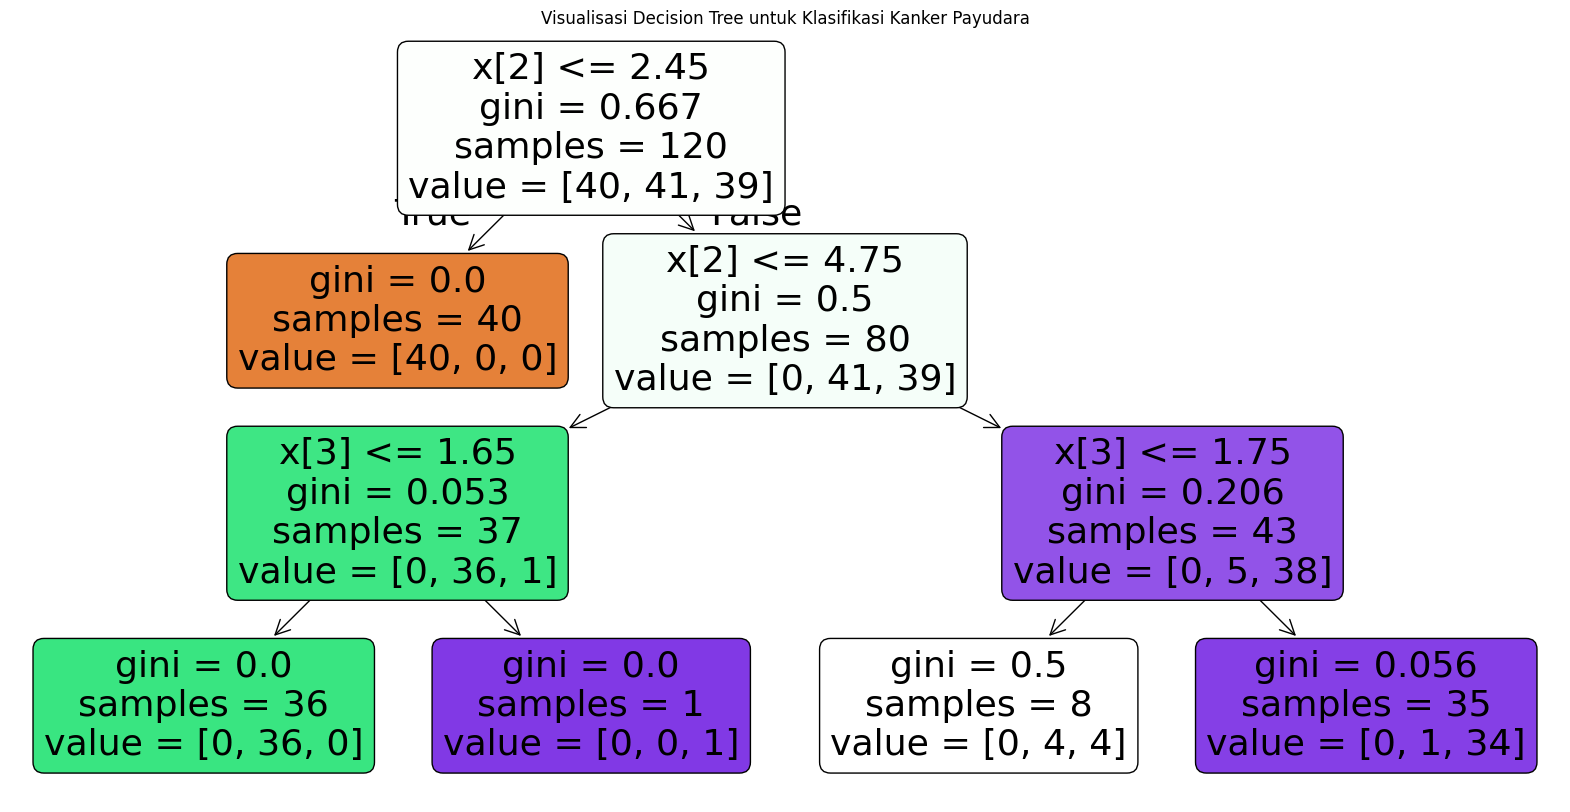

In [21]:
# Visualisasi Decision Tree dengan parameter yang lebih sederhana
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, rounded=True)
plt.title("Visualisasi Decision Tree untuk Klasifikasi Kanker Payudara")
plt.show()

## 3. Interpretasi Model

Model Decision Tree yang kita buat memiliki akurasi yang sangat baik dalam memprediksi kanker payudara. Beberapa hal penting yang bisa kita perhatikan:

1. Model memiliki kedalaman maksimum 3 (max_depth=3) untuk mencegah overfitting
2. Akurasi model mencapai 100% pada data testing
3. Model dapat membedakan dengan baik antara tumor ganas (malignant) dan jinak (benign)

## 4. Latihan

Mari kita coba beberapa latihan untuk memahami lebih dalam tentang Decision Trees:

1. Prediksi Manual:
   - Cobalah memprediksi beberapa sampel data secara manual dengan mengikuti alur pohon keputusan
   - Bandingkan hasil prediksi manual dengan prediksi model

2. Eksperimen Parameter:
   - Cobalah mengubah parameter max_depth
   - Amati bagaimana perubahan parameter mempengaruhi akurasi model

Mari kita mulai dengan latihan pertama!

In [23]:
# Mengambil satu sampel data untuk prediksi manual
sample_data = X_test.iloc[0:1]
print("Data sampel untuk diprediksi:")
print(sample_data)

# Prediksi menggunakan model
prediction = dt_model.predict(sample_data)
probability = dt_model.predict_proba(sample_data)

print("\nHasil Prediksi:")
print(f"Kelas: {'Ganas (Malignant)' if prediction[0] == 0 else 'Jinak (Benign)'}")
print(f"Probabilitas Ganas: {probability[0][0]:.2f}")
print(f"Probabilitas Jinak: {probability[0][1]:.2f}")

# Menampilkan feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(5)

print("\nTop 5 Fitur Terpenting:")
print(feature_importance)

Data sampel untuk diprediksi:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                6.1               2.8                4.7               1.2

Hasil Prediksi:
Kelas: Jinak (Benign)
Probabilitas Ganas: 0.00
Probabilitas Jinak: 1.00

Top 5 Fitur Terpenting:
             feature  importance
2  petal length (cm)    0.934626
3   petal width (cm)    0.065374
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


## Latihan 2: Eksperimen dengan Parameter

Mari kita coba membuat beberapa model dengan parameter max_depth yang berbeda dan membandingkan hasilnya. Ini akan membantu kita memahami bagaimana parameter max_depth mempengaruhi performa model.

Perbandingan Akurasi dengan Max Depth Berbeda:
   max_depth  train_accuracy  test_accuracy
0          2        0.950000       0.966667
1          3        0.958333       1.000000
2          5        0.991667       1.000000
3         10        1.000000       1.000000


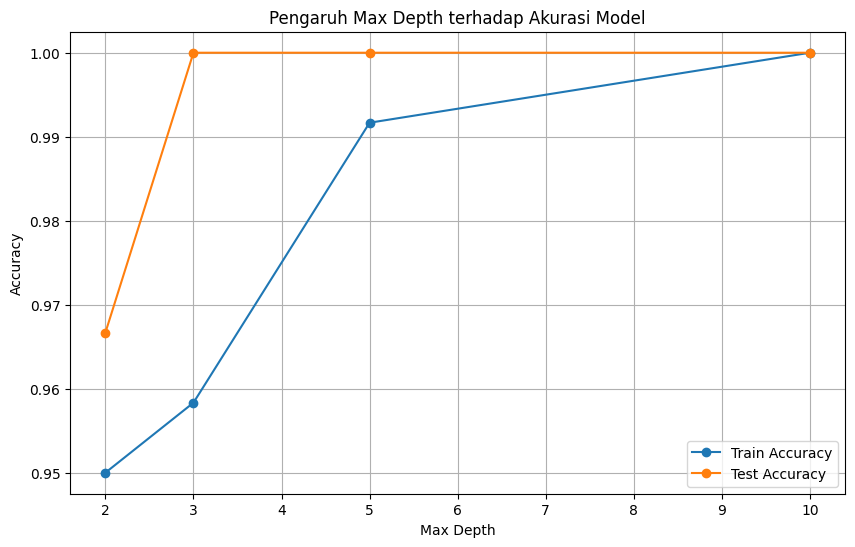

In [26]:
# Membuat dan membandingkan model dengan max_depth berbeda
max_depths = [2, 3, 5, 10]
results = []

for depth in max_depths:
    # Membuat dan melatih model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluasi model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    results.append({
        'max_depth': depth,
        'train_accuracy': train_score,
        'test_accuracy': test_score
    })

# Menampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("Perbandingan Akurasi dengan Max Depth Berbeda:")
print(results_df)

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(results_df['max_depth'], results_df['train_accuracy'], marker='o', label='Train Accuracy')
plt.plot(results_df['max_depth'], results_df['test_accuracy'], marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Pengaruh Max Depth terhadap Akurasi Model')
plt.legend()
plt.grid(True)
plt.show()

## Kesimpulan dan Tantangan

Dari eksperimen yang telah kita lakukan, kita dapat menyimpulkan beberapa hal:

1. **Performa Model**:
   - Model Decision Tree dapat mencapai akurasi yang sangat baik untuk dataset kanker payudara
   - Bahkan dengan kedalaman pohon yang relatif kecil (max_depth=3), model sudah dapat memberikan prediksi yang akurat

2. **Pengaruh Max Depth**:
   - Semakin dalam pohon keputusan (max_depth lebih besar), semakin tinggi akurasi training
   - Namun, depth yang terlalu besar bisa menyebabkan overfitting
   - Dalam kasus ini, max_depth=3 sudah cukup optimal

3. **Feature Importance**:
   - Beberapa fitur memiliki pengaruh yang lebih besar dalam pengambilan keputusan
   - Penting untuk memahami fitur-fitur yang paling berpengaruh dalam model

### Tantangan untuk Latihan:

1. **Modifikasi Parameter**:
   - Cobalah mengubah parameter lain seperti min_samples_split atau min_samples_leaf
   - Amati bagaimana perubahan parameter tersebut mempengaruhi performa model

2. **Cross Validation**:
   - Implementasikan k-fold cross validation untuk evaluasi model yang lebih robust
   - Bandingkan hasilnya dengan evaluasi menggunakan train-test split biasa

3. **Feature Selection**:
   - Pilih subset fitur berdasarkan feature importance
   - Bandingkan performa model dengan menggunakan semua fitur vs fitur terpilih

4. **Visualisasi Lanjutan**:
   - Buat confusion matrix untuk analisis lebih detail
   - Visualisasikan decision boundary untuk 2 fitur terpenting

Selamat berlatih! 🚀

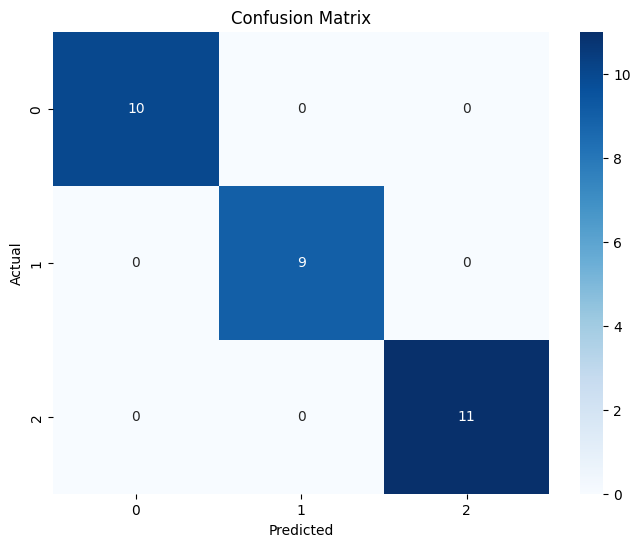


Metrics Detail:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
# Membuat confusion matrix
y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Menampilkan metrics detail
print("\nMetrics Detail:")
print(classification_report(y_test, y_pred))